In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rt-iot2022real-time-internet-of-things/RT_IOT2022.csv


In [54]:
# import libraries
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBModel, XGBRegressor




In [6]:
# read the file
df = pd.read_csv('/kaggle/input/rt-iot2022real-time-internet-of-things/RT_IOT2022.csv')
df.head()

no  id.orig_p  id.resp_p proto service  flow_duration  fwd_pkts_tot  \
0   0      38667       1883   tcp    mqtt      32.011598             9   
1   1      51143       1883   tcp    mqtt      31.883584             9   
2   2      44761       1883   tcp    mqtt      32.124053             9   
3   3      60893       1883   tcp    mqtt      31.961063             9   
4   4      51087       1883   tcp    mqtt      31.902362             9   

   bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  ...  active.std  \
0             5                  3                  3  ...         0.0   
1             5                  3                  3  ...         0.0   
2             5                  3                  3  ...         0.0   
3             5                  3                  3  ...         0.0   
4             5                  3                  3  ...         0.0   

       idle.min      idle.max      idle.tot      idle.avg  idle.std  \
0  2.972918e+07  2.972918e+07  2.972918e+07  2.972918e+07       0.0   
1  2.985528e+07  2.985528e+07  2.985528e+07  2.985528e+07       0.0   
2  2.984215e+07  2.984215e+07  2.984215e+07  2.984215e+07       0.0   
3  2.991377e+07  2.991377e+07  2.991377e+07  2.991377e+07       0.0   
4  2.981470e+07  2.981470e+07  2.981470e+07  2.981470e+07       0.0   

   fwd_init_window_size  bwd_init_window_size  fwd_last_window_size  \
0                 64240                 26847                   502   
1                 64240                 26847                   502   
2                 64240                 26847                   502   
3                 64240                 26847                   502   
4                 64240                 26847                   502   

    Attack_type  
0  MQTT_Publish  
1  MQTT_Publish  
2  MQTT_Publish  
3  MQTT_Publish  
4  MQTT_Publish  

[5 rows x 85 columns]

In [7]:
df.shape

(123117, 85)

In [8]:
# check descriptive statistics of the data
df.describe()

no      id.orig_p      id.resp_p  flow_duration  \
count  123117.000000  123117.000000  123117.000000  123117.000000   
mean    37035.089248   34639.258738    1014.305092       3.809566   
std     30459.106367   19070.620354    5256.371994     130.005408   
min         0.000000       0.000000       0.000000       0.000000   
25%      6059.000000   17702.000000      21.000000       0.000001   
50%     33100.000000   37221.000000      21.000000       0.000004   
75%     63879.000000   50971.000000      21.000000       0.000005   
max     94658.000000   65535.000000   65389.000000   21728.335578   

        fwd_pkts_tot   bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  \
count  123117.000000  123117.000000      123117.000000      123117.000000   
mean        2.268826       1.909509           1.471218           0.820260   
std        22.336565      33.018311          19.635196          32.293948   
min         0.000000       0.000000           0.000000           0.000000   
25%         1.000000       1.000000           1.000000           0.000000   
50%         1.000000       1.000000           1.000000           0.000000   
75%         1.000000       1.000000           1.000000           0.000000   
max      4345.000000   10112.000000        4345.000000       10105.000000   

       fwd_pkts_per_sec  bwd_pkts_per_sec  ...    active.avg    active.std  \
count      1.231170e+05      1.231170e+05  ...  1.231170e+05  1.231170e+05   
mean       3.518063e+05      3.517620e+05  ...  1.481354e+05  2.353599e+04   
std        3.707645e+05      3.708015e+05  ...  1.613007e+06  1.477935e+06   
min        0.000000e+00      0.000000e+00  ...  0.000000e+00  0.000000e+00   
25%        7.454354e+01      7.288927e+01  ...  9.536740e-01  0.000000e+00   
50%        2.467238e+05      2.467238e+05  ...  4.053116e+00  0.000000e+00   
75%        5.242880e+05      5.242880e+05  ...  5.006790e+00  0.000000e+00   
max        1.048576e+06      1.048576e+06  ...  4.374931e+08  4.774862e+08   

           idle.min      idle.max      idle.tot      idle.avg      idle.std  \
count  1.231170e+05  1.231170e+05  1.231170e+05  1.231170e+05  1.231170e+05   
mean   1.616655e+06  1.701956e+06  3.517644e+06  1.664985e+06  4.550183e+04   
std    8.809396e+06  9.252337e+06  1.229508e+08  9.007064e+06  1.091361e+06   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
max    3.000000e+08  3.000000e+08  2.096777e+10  3.000000e+08  1.208029e+08   

       fwd_init_window_size  bwd_init_window_size  fwd_last_window_size  
count         123117.000000         123117.000000         123117.000000  
mean            6118.905123           2739.776018            751.647514  
std            18716.313861          10018.848534           6310.183843  
min                0.000000              0.000000              0.000000  
25%               64.000000              0.000000             64.000000  
50%               64.000000              0.000000             64.000000  
75%               64.000000              0.000000             64.000000  
max            65535.000000          65535.000000          65535.000000  

[8 rows x 82 columns]

In [9]:
df.columns

Index(['no', 'id.orig_p', 'id.resp_p', 'proto', 'service', 'flow_duration',
       'fwd_pkts_tot', 'bwd_pkts_tot', 'fwd_data_pkts_tot',
       'bwd_data_pkts_tot', 'fwd_pkts_per_sec', 'bwd_pkts_per_sec',
       'flow_pkts_per_sec', 'down_up_ratio', 'fwd_header_size_tot',
       'fwd_header_size_min', 'fwd_header_size_max', 'bwd_header_size_tot',
       'bwd_header_size_min', 'bwd_header_size_max', 'flow_FIN_flag_count',
       'flow_SYN_flag_count', 'flow_RST_flag_count', 'fwd_PSH_flag_count',
       'bwd_PSH_flag_count', 'flow_ACK_flag_count', 'fwd_URG_flag_count',
       'bwd_URG_flag_count', 'flow_CWR_flag_count', 'flow_ECE_flag_count',
       'fwd_pkts_payload.min', 'fwd_pkts_payload.max', 'fwd_pkts_payload.tot',
       'fwd_pkts_payload.avg', 'fwd_pkts_payload.std', 'bwd_pkts_payload.min',
       'bwd_pkts_payload.max', 'bwd_pkts_payload.tot', 'bwd_pkts_payload.avg',
       'bwd_pkts_payload.std', 'flow_pkts_payload.min',
       'flow_pkts_payload.max', 'flow_pkts_payload.tot',
  

We have forwadm backward packets. Alongside the protocols, services and attack types. each rows is an instance of flows in the network

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123117 entries, 0 to 123116
Data columns (total 85 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   no                        123117 non-null  int64  
 1   id.orig_p                 123117 non-null  int64  
 2   id.resp_p                 123117 non-null  int64  
 3   proto                     123117 non-null  object 
 4   service                   123117 non-null  object 
 5   flow_duration             123117 non-null  float64
 6   fwd_pkts_tot              123117 non-null  int64  
 7   bwd_pkts_tot              123117 non-null  int64  
 8   fwd_data_pkts_tot         123117 non-null  int64  
 9   bwd_data_pkts_tot         123117 non-null  int64  
 10  fwd_pkts_per_sec          123117 non-null  float64
 11  bwd_pkts_per_sec          123117 non-null  float64
 12  flow_pkts_per_sec         123117 non-null  float64
 13  down_up_ratio             123117 non-null  f

In [11]:
# check any null value
df.isnull().sum()

no                      0
id.orig_p               0
id.resp_p               0
proto                   0
service                 0
                       ..
idle.std                0
fwd_init_window_size    0
bwd_init_window_size    0
fwd_last_window_size    0
Attack_type             0
Length: 85, dtype: int64

## visualisations

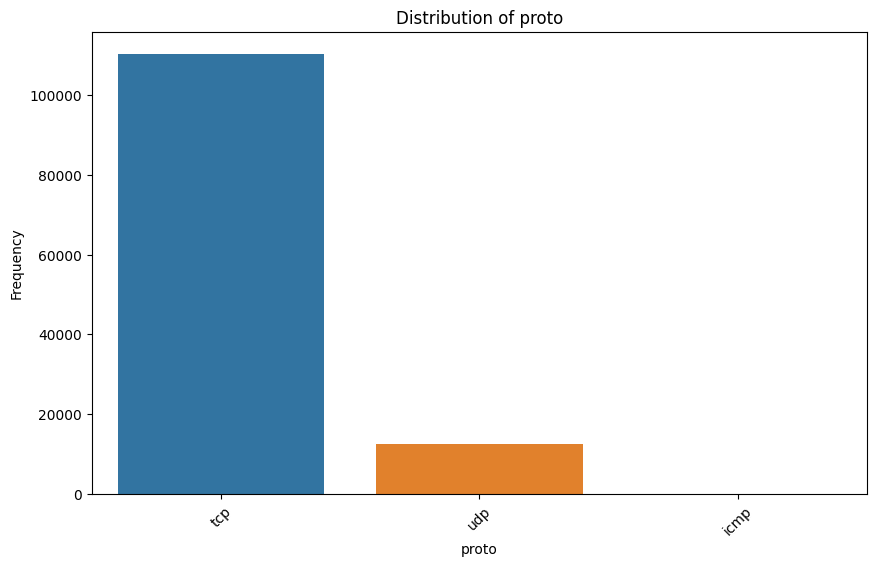

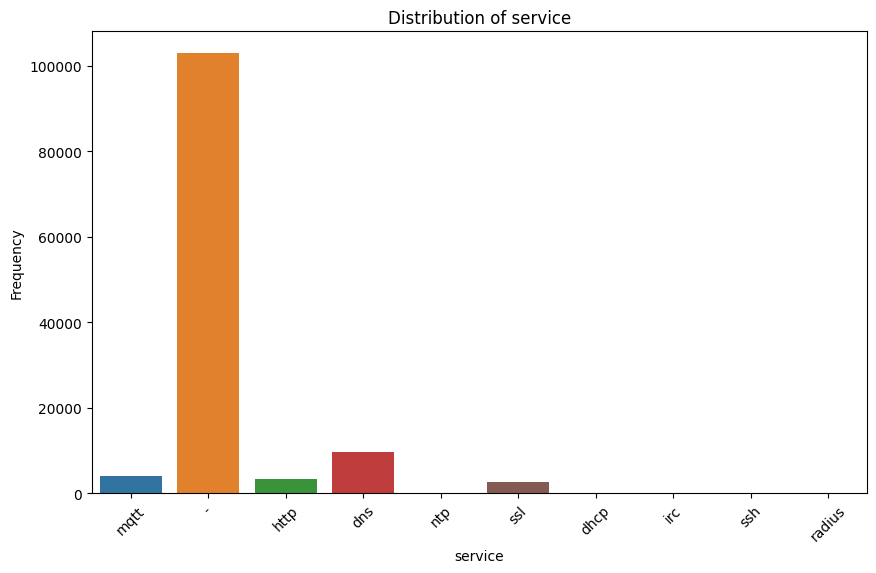

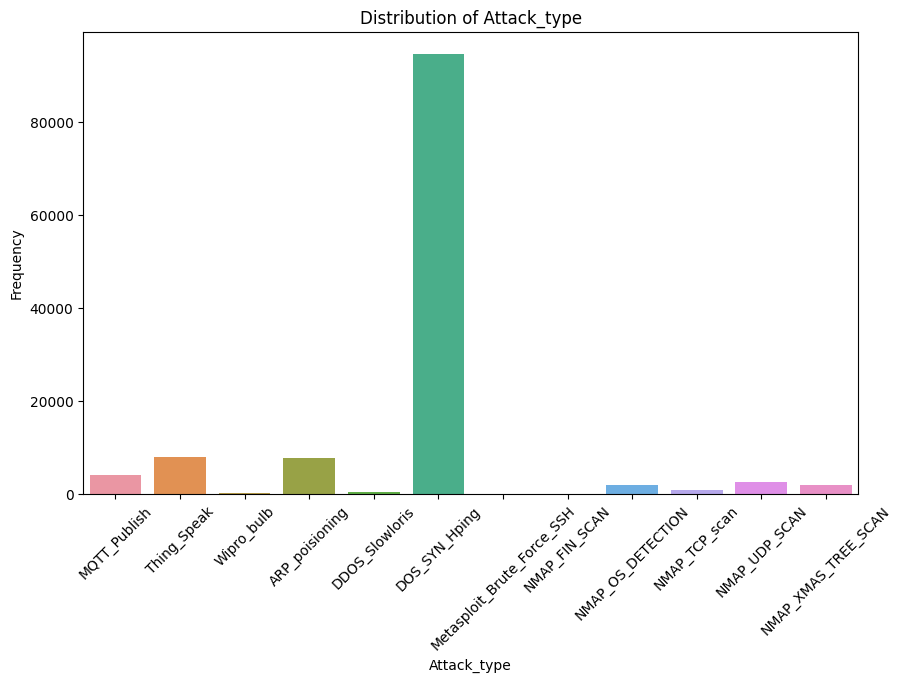

In [13]:
# plot categorical values of (Protocol, Service and Attack_Type)
categories = ['proto', 'service', 'Attack_type']
for feature in categoories:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=df)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()


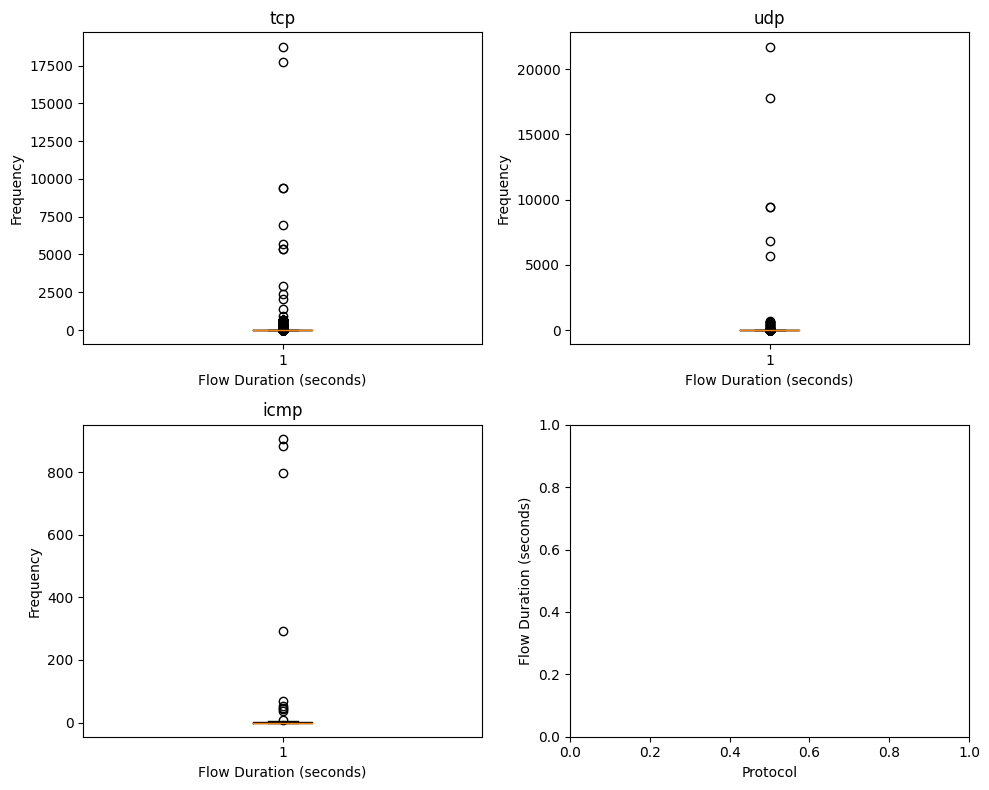

In [14]:
# Create subplots for each protocol
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot boxplots for each protocol using list comprehension
protocols = df['proto'].unique()
[axs[i // 2, i % 2].boxplot(df[df['proto'] == p]['flow_duration']) for i, p in enumerate(protocols)]

# Set titles, labels, and adjust layout
for i, proto in enumerate(protocols):
    axs[i // 2, i % 2].set_title(proto)
    axs[i // 2, i % 2].set_xlabel('Flow Duration (seconds)')
    axs[i // 2, i % 2].set_ylabel('Frequency')

plt.tight_layout()
plt.xlabel('Protocol')
plt.ylabel('Flow Duration (seconds)')
plt.show()

there are outliers in the record. we might apply min max scaling. which is suitable for appearances of outliers.

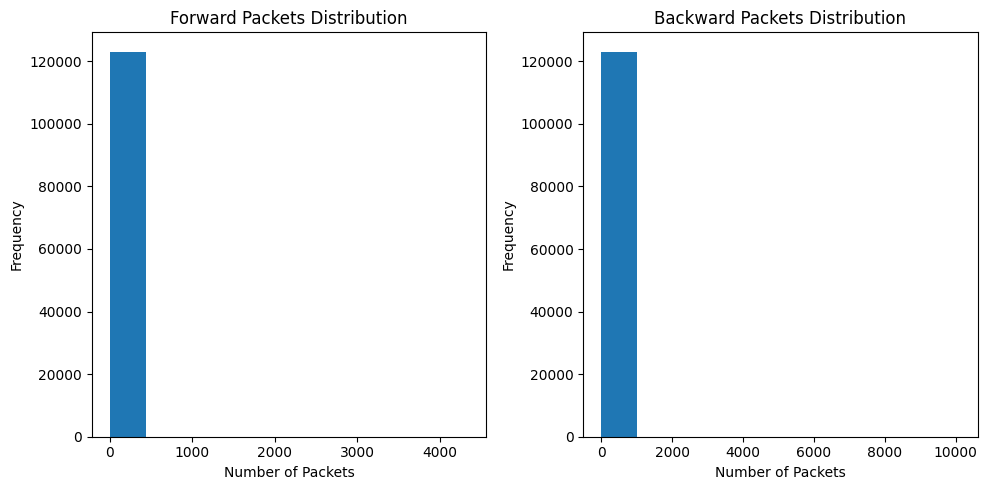

In [16]:
# cistribution of packets counts

# Create the figure for plots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].hist(df['fwd_pkts_tot'])
axs[0].set_title('Forward Packets Distribution')
axs[0].set_xlabel('Number of Packets')
axs[0].set_ylabel('Frequency')

axs[1].hist(df['bwd_pkts_tot'])
axs[1].set_title('Backward Packets Distribution')
axs[1].set_xlabel('Number of Packets')
axs[1].set_ylabel('Frequency')

plt.tight_layout()

plt.show()

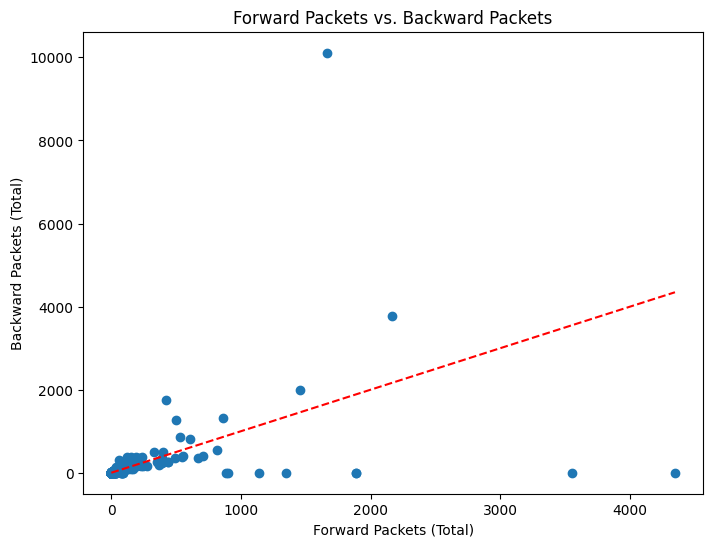

In [17]:
# Create the figure for the scatter plot
plt.figure(figsize=(8, 6))

# scatter plot
plt.scatter(df['fwd_pkts_tot'], df['bwd_pkts_tot'])
plt.title('Forward Packets vs. Backward Packets')
plt.xlabel('Forward Packets (Total)')
plt.ylabel('Backward Packets (Total)')

# Add a reference line (optional)
# You can adjust the slope and y-intercept based on your data's characteristics
plt.plot([0, df['fwd_pkts_tot'].max()], [0, df['fwd_pkts_tot'].max()], color='r', linestyle='--')

plt.show()

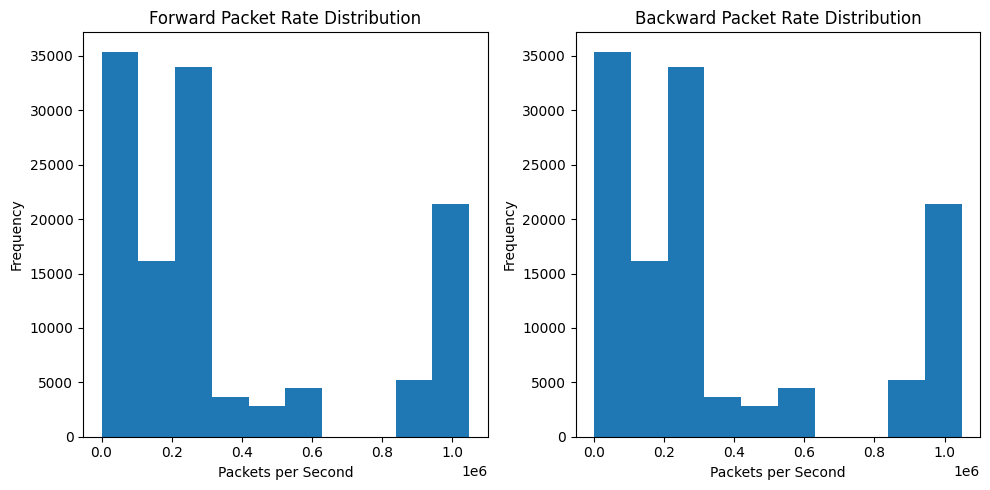

In [18]:
# display distribution of packet sizes
# Create the figure for plots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))


axs[0].hist(df['fwd_pkts_per_sec'])
axs[0].set_title('Forward Packet Rate Distribution')
axs[0].set_xlabel('Packets per Second')
axs[0].set_ylabel('Frequency')

axs[1].hist(df['bwd_pkts_per_sec'])
axs[1].set_title('Backward Packet Rate Distribution')
axs[1].set_xlabel('Packets per Second')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

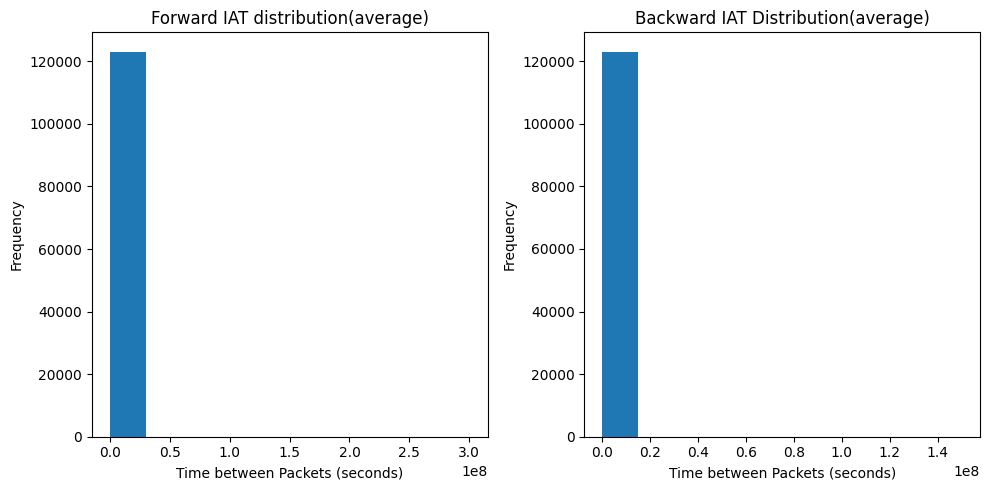

In [22]:
# Create the figure for plots for IAT
fig, axs = plt.subplots(1, 2, figsize=(10, 5))


axs[0].hist(df['fwd_iat.avg'])
axs[0].set_title('Forward IAT distribution(average)')
axs[0].set_xlabel('Time between Packets (seconds)')
axs[0].set_ylabel('Frequency')

axs[1].hist(df['bwd_iat.avg'])
axs[1].set_title('Backward IAT Distribution(average)')
axs[1].set_xlabel('Time between Packets (seconds)')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

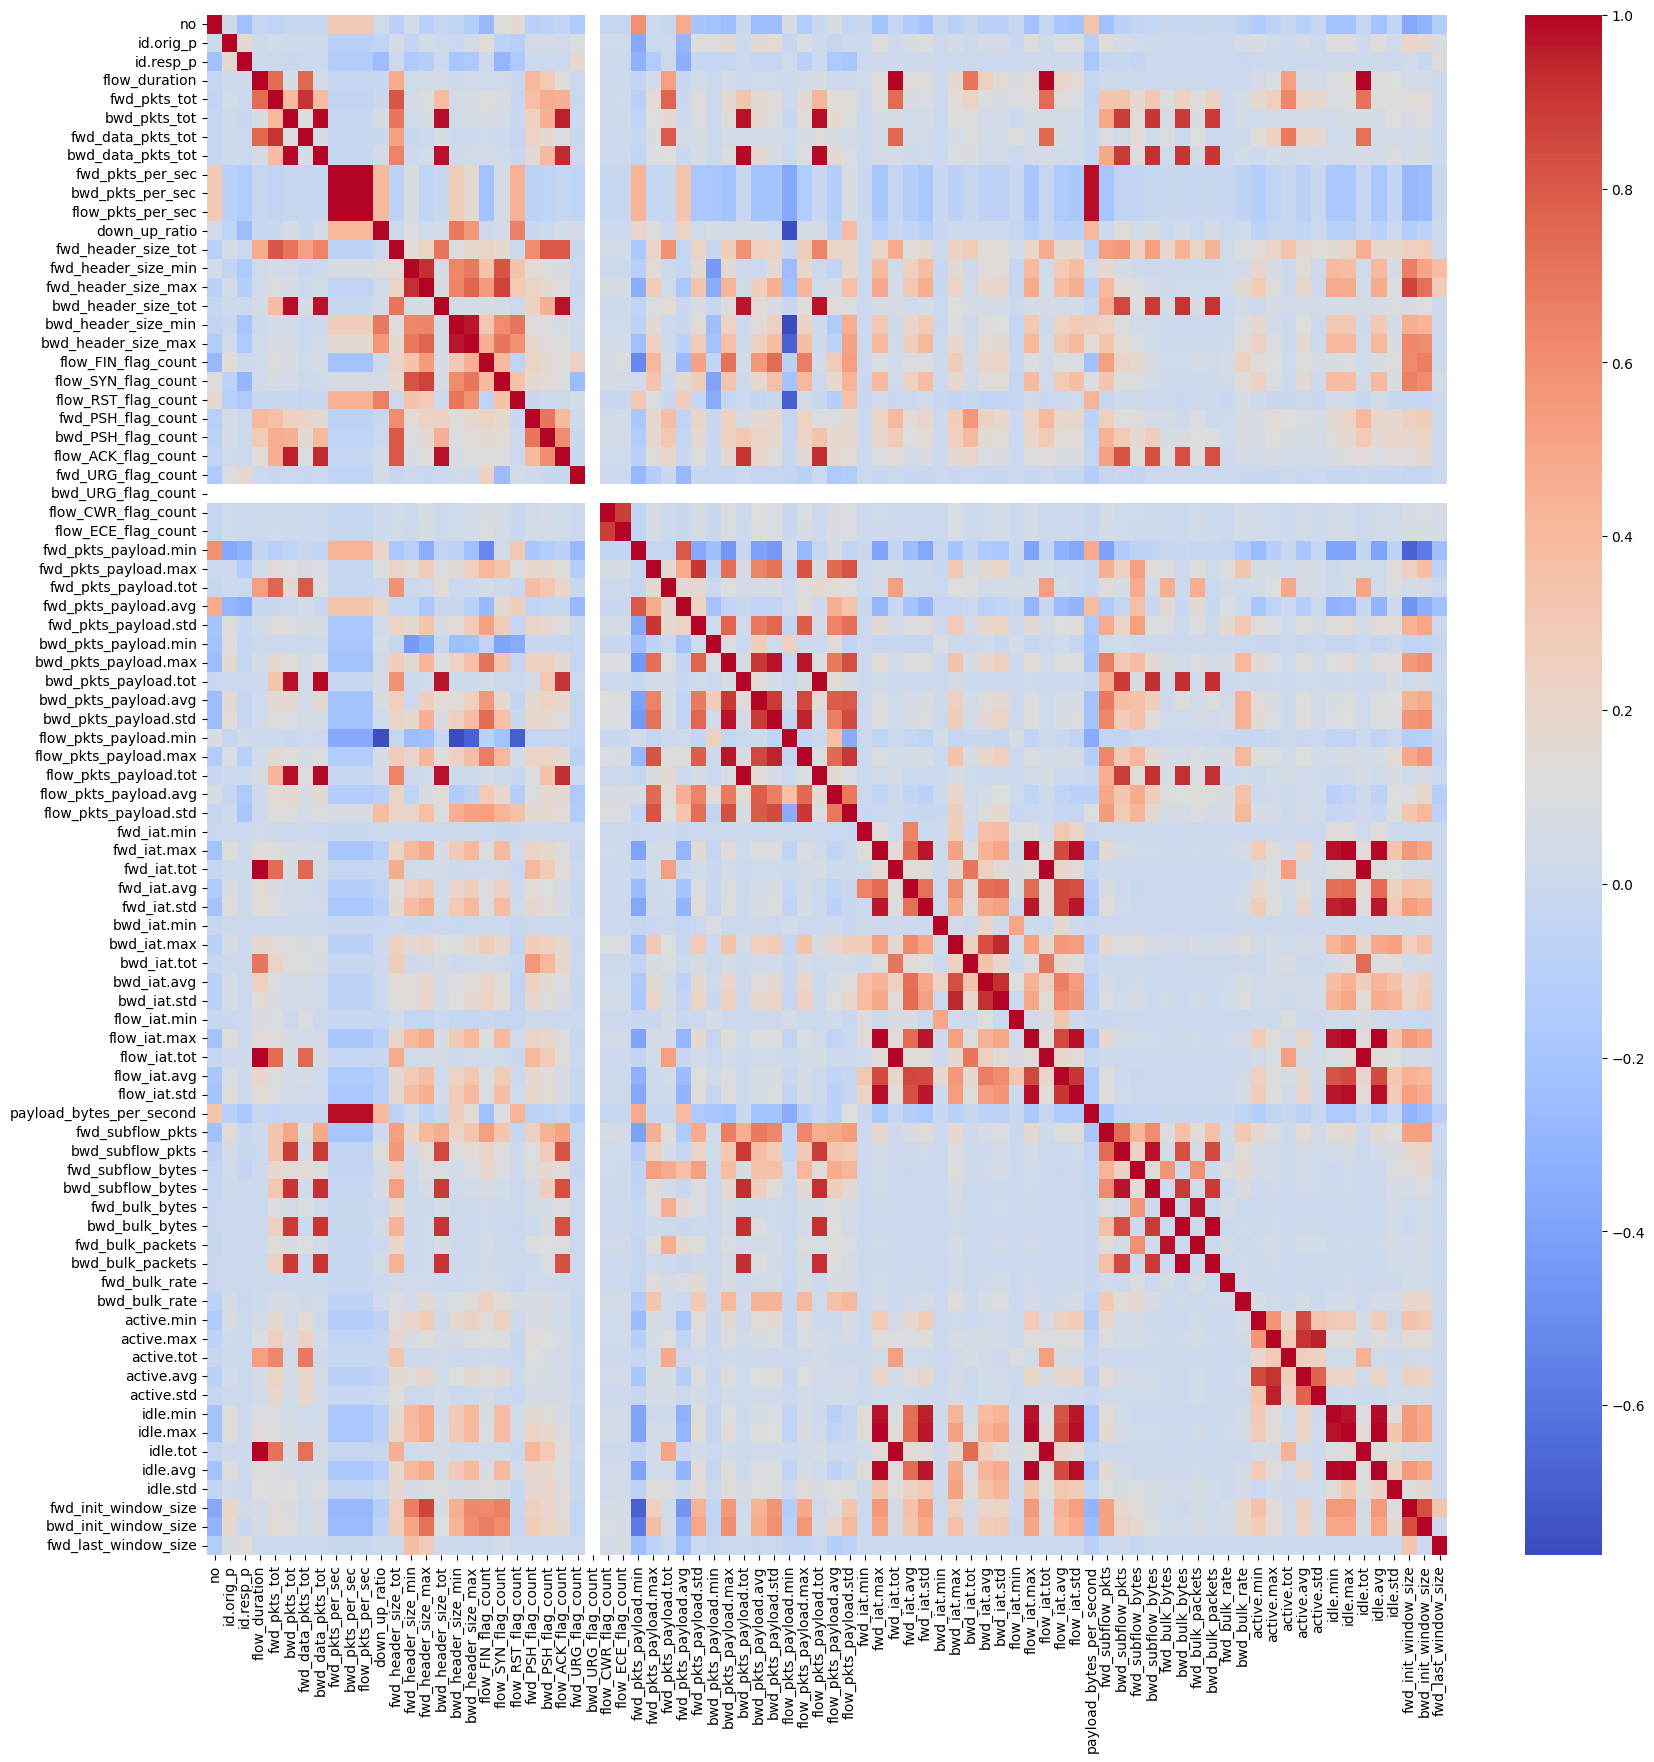

In [29]:
# check the correlation to see relationships

numeric_columns = df.select_dtypes(include=[np.number]) 

# Calculate the correlation matrix
correlation = numeric_columns.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation, annot=False, cmap='coolwarm')
plt.show()



## ML MODEL (normalization and ml models)

In [86]:
# define independent and dependent variable (s)
X = df.drop(['Attack_type'], axis=1)
y = df['Attack_type']

In [87]:
# encode categorical variables
le = LabelEncoder()
X['proto'] = le.fit_transform(X['proto'])
X['service'] = le.fit_transform(X['service'])
# y = le.fit_transform(y)

In [36]:
X.head()

no  id.orig_p  id.resp_p  proto  service  flow_duration  fwd_pkts_tot  \
0   0      38667       1883      1        5      32.011598             9   
1   1      51143       1883      1        5      31.883584             9   
2   2      44761       1883      1        5      32.124053             9   
3   3      60893       1883      1        5      31.961063             9   
4   4      51087       1883      1        5      31.902362             9   

   bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  ...    active.avg  \
0             5                  3                  3  ...  2.282415e+06   
1             5                  3                  3  ...  2.028307e+06   
2             5                  3                  3  ...  2.281904e+06   
3             5                  3                  3  ...  2.047288e+06   
4             5                  3                  3  ...  2.087657e+06   

   active.std      idle.min      idle.max      idle.tot      idle.avg  \
0         0.0  2.972918e+07  2.972918e+07  2.972918e+07  2.972918e+07   
1         0.0  2.985528e+07  2.985528e+07  2.985528e+07  2.985528e+07   
2         0.0  2.984215e+07  2.984215e+07  2.984215e+07  2.984215e+07   
3         0.0  2.991377e+07  2.991377e+07  2.991377e+07  2.991377e+07   
4         0.0  2.981470e+07  2.981470e+07  2.981470e+07  2.981470e+07   

   idle.std  fwd_init_window_size  bwd_init_window_size  fwd_last_window_size  
0       0.0                 64240                 26847                   502  
1       0.0                 64240                 26847                   502  
2       0.0                 64240                 26847                   502  
3       0.0                 64240                 26847                   502  
4       0.0                 64240                 26847                   502  

[5 rows x 84 columns]

In [73]:
# test min max scaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)



In [74]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.25, random_state = 42)
# try ML Models


# Define the model architecture for Multi-Layer Perceptron method
model = MLPClassifier(hidden_layer_sizes=(16, 16), activation='relu', solver='adam', random_state=1)  # Adjust hyperparameters as needed

# Train the model
model.fit(X_train, y_train)

# Predict on new data
y_pred = model.predict(X_test)

# Evaluate the model 
accuracy = accuracy_score(y_test, y_pred)
print('Test accuracy:', accuracy)

Test accuracy: 0.9958414554905783


**Test Accuracy for MLP is 99.58%**

In [75]:
# Define the model architecture for Random Classifier 
re_model = RandomForestClassifier(n_estimators=200, random_state=63)

#train the model
re_model.fit(X_train, y_train)

#predict on new data
y_pred_re = re_model.predict(X_test)

#Evalueate tbe model
acc_re = accuracy_score(y_test, y_pred_re)
print('Test accuracy for Random Forest Classifier:', acc_re * 100)

Test accuracy for Random Forest Classifier: 99.85380116959064


In [95]:
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)




In [45]:
num_classes = len(set(y_train))
print('Number of classes:', num_classes)

Number of classes: 12


In [96]:
# try keras
from tensorflow import keras
from tensorflow.keras import layers

num_classes = 12

# Define the model architecture
model = keras.Sequential([
  layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer with 64 neurons and ReLU activation
  layers.Dense(32, activation='relu'),  # Hidden layer with 32 neurons and ReLU activation
  layers.Dense(num_classes, activation='softmax')  # Output layer with softmax activation 
])

# Compile the model (specifies optimizer, loss function, and metrics)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model (fit on training data)
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model (test on unseen data)
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2886/2886 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8939 - loss: 253849.4844
Epoch 2/10
2886/2886 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9336 - loss: 23251.5703
Epoch 3/10
2886/2886 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9005 - loss: 104.2696
Epoch 4/10
2886/2886 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8885 - loss: 149.2887
Epoch 5/10
2886/2886 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8814 - loss: 264.2566
Epoch 6/10
2886/2886 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8721 - loss: 3.4919
Epoch 7/10
2886/2886 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8450 - loss: 1.3676
Epoch 8/10
2886/2886 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8341 - loss: 0.4429
Epoch 9/10
2886/2886 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8335 - loss: 0.4825
Epoch 10/10
2886/2886 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8343 - loss: 0.4277
962/962 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8314 - loss: 1.8197
Test accuracy: 0.8321962356567383


 MLP model using keras accuracy is 83.21%